In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [2]:
os.getcwd()

'C:\\Users\\USER\\Documents\\project\\code'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['APT_List.pkl',
 'APT_Tidy.pkl',
 'Cereal.pkl',
 'Univ_Admit.pkl',
 'Used_Cars.pkl']

In [5]:
df = pd.read_pickle('Univ_Admit.pkl')

In [6]:
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,Fail,380.0,3.61,0,0,1,0
1,Pass,660.0,3.67,0,0,1,0
2,Pass,800.0,4.00,1,0,0,0
3,Pass,640.0,3.19,0,0,0,1
4,Fail,520.0,2.93,0,0,0,1


In [7]:
yvar = 'admit'
X = df.drop(columns = yvar)
y = df[yvar].copy()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y
)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier(
    min_samples_split = 20,
    min_samples_leaf = 10, 
    random_state = 0
)

In [12]:
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

In [13]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [14]:
model.score(X = X_train, y = y_train)

0.764406779661017

In [15]:
model.score(X = X_valid, y = y_valid)

0.7140039447731755

In [16]:
y_vprob1 = model.predict_proba(X = X_valid)

In [18]:
??hds.stat.roc_curve

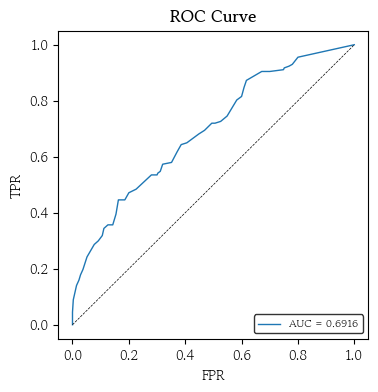

In [17]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1)

In [19]:
y_vpred1 = model.predict(X = X_valid)

In [21]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,306,101,407
Pass,44,56,100
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7518    0.8743    0.8085       350
        Pass     0.5600    0.3567    0.4358       157

    accuracy                         0.7140       507
   macro avg     0.6559    0.6155    0.6221       507
weighted avg     0.6924    0.7140    0.6931       507



In [22]:
from sklearn.tree import plot_tree

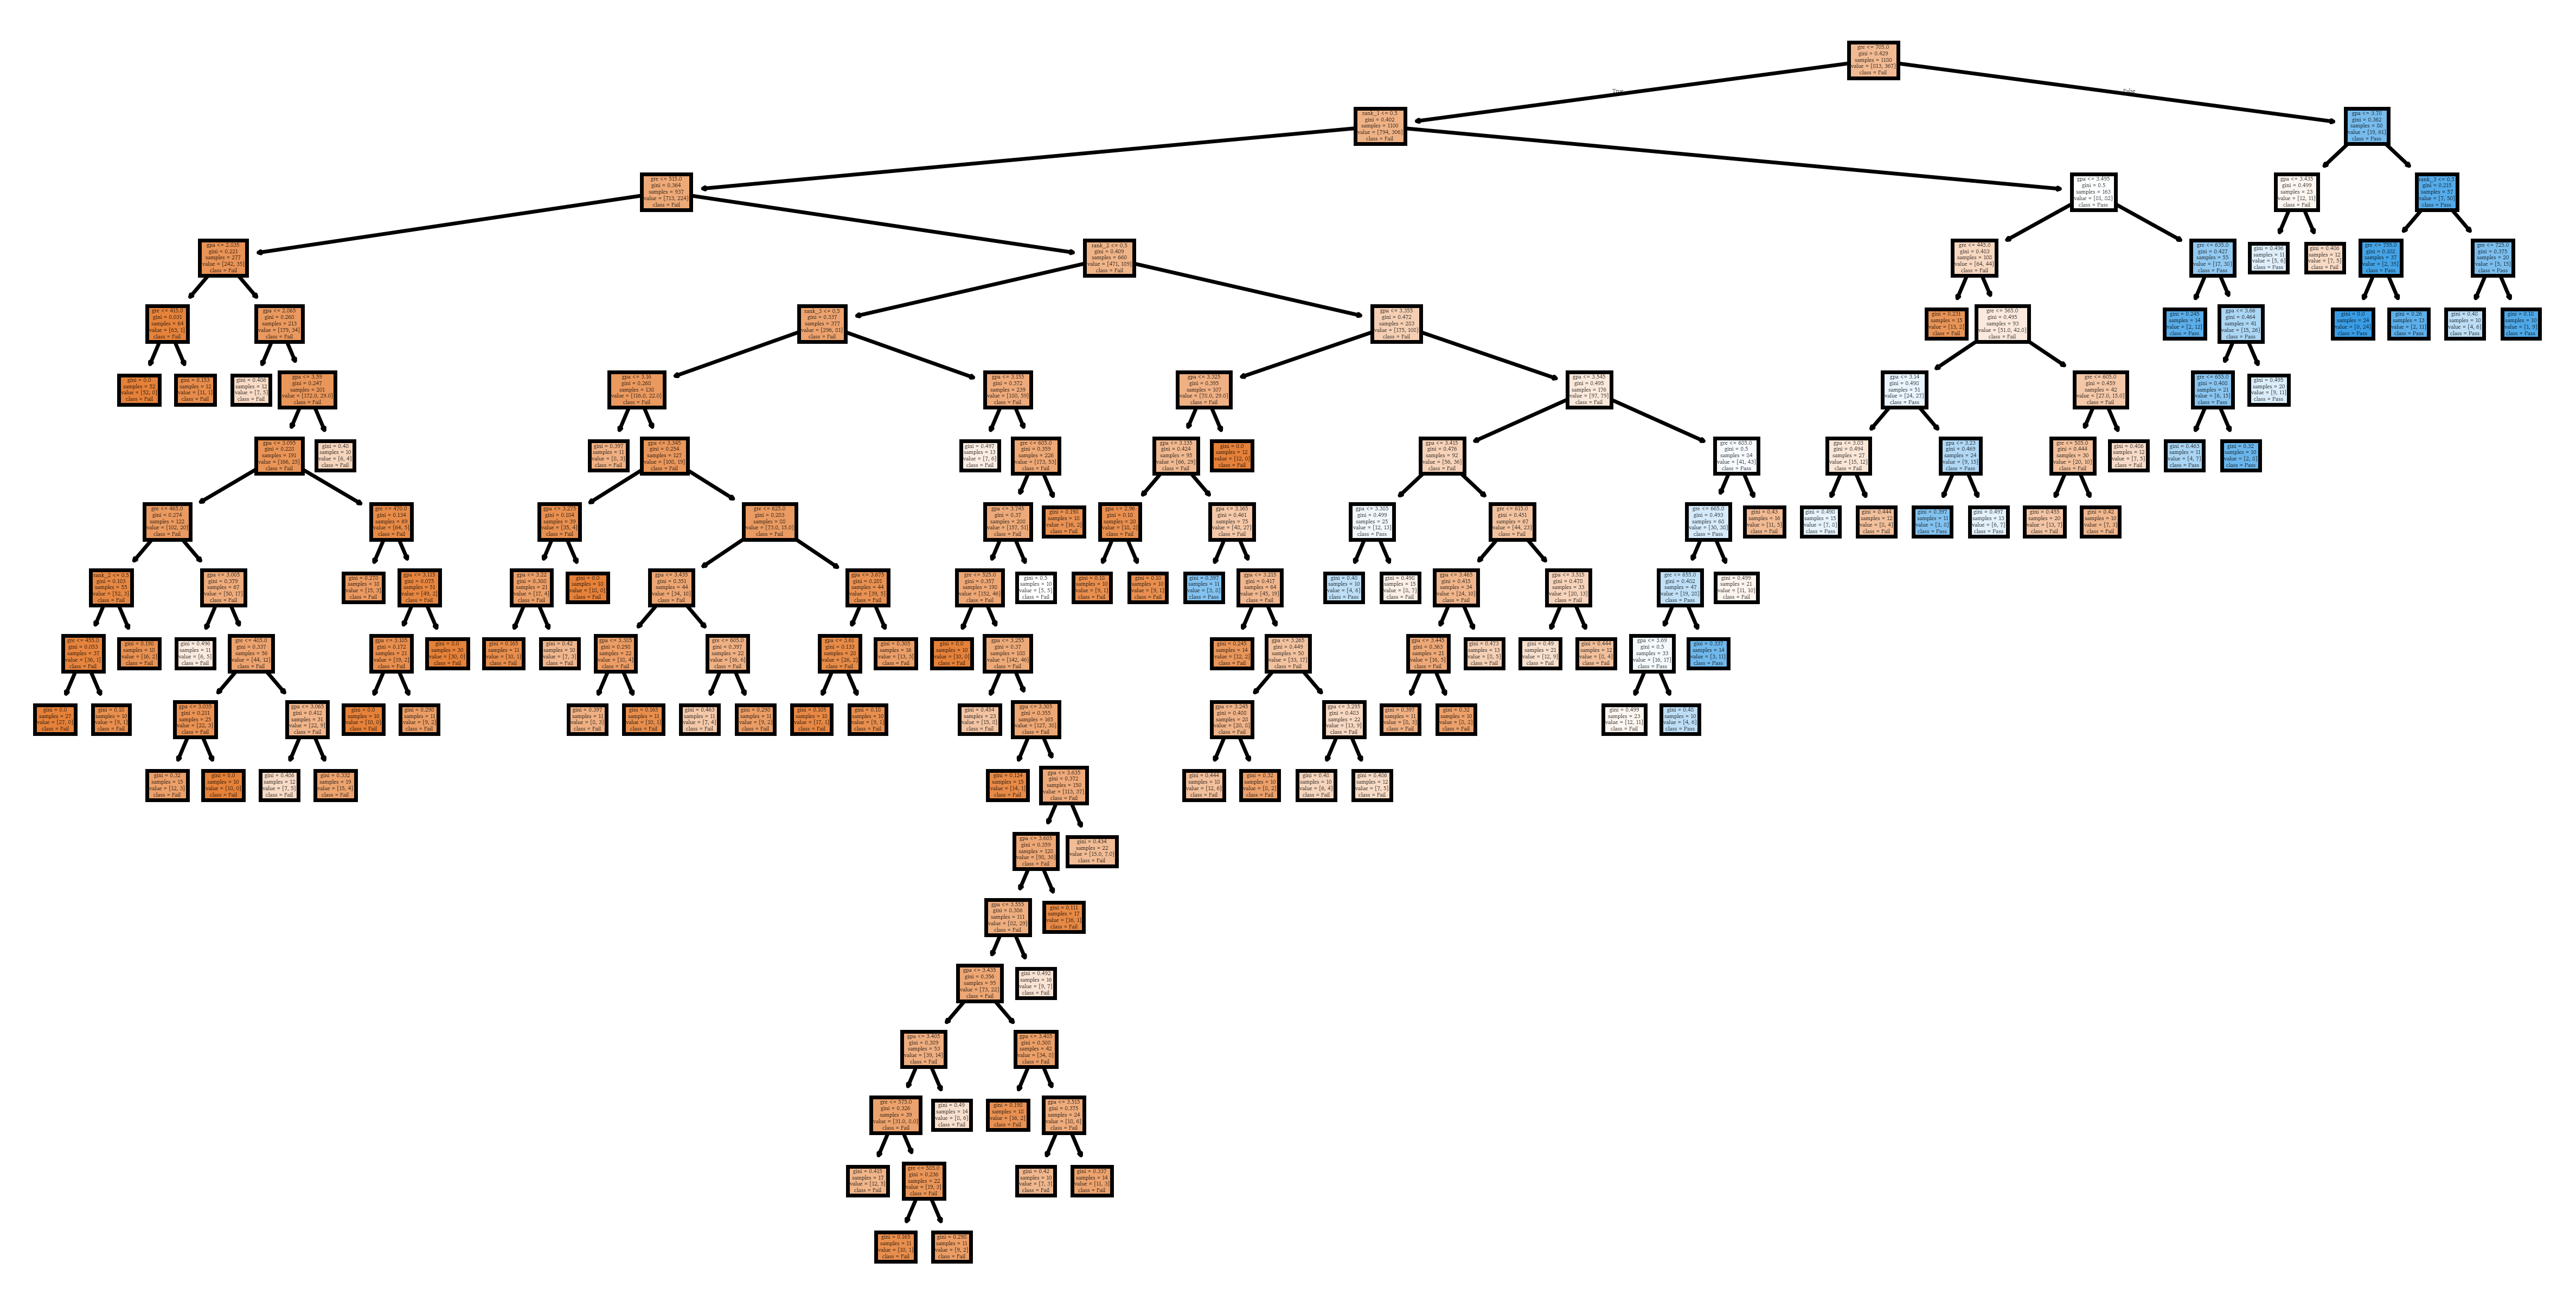

In [30]:
plt.figure(figsize = (12, 6), dpi = 500)
plot_tree(decision_tree = model, 
          feature_names = X_train.columns, 
          class_names = list(model.classes_),
          filled = True);

In [31]:
os.getcwd()

'C:\\Users\\USER\\Documents\\project\\data'

In [32]:
folder_path = '../image'

In [34]:
not os.path.exists(folder_path)

True

In [35]:
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

In [36]:
os.chdir(folder_path)

In [37]:
hds.ml.plot_tree(model = model, fileName = 'dtc1')

In [38]:
from IPython.display import Image

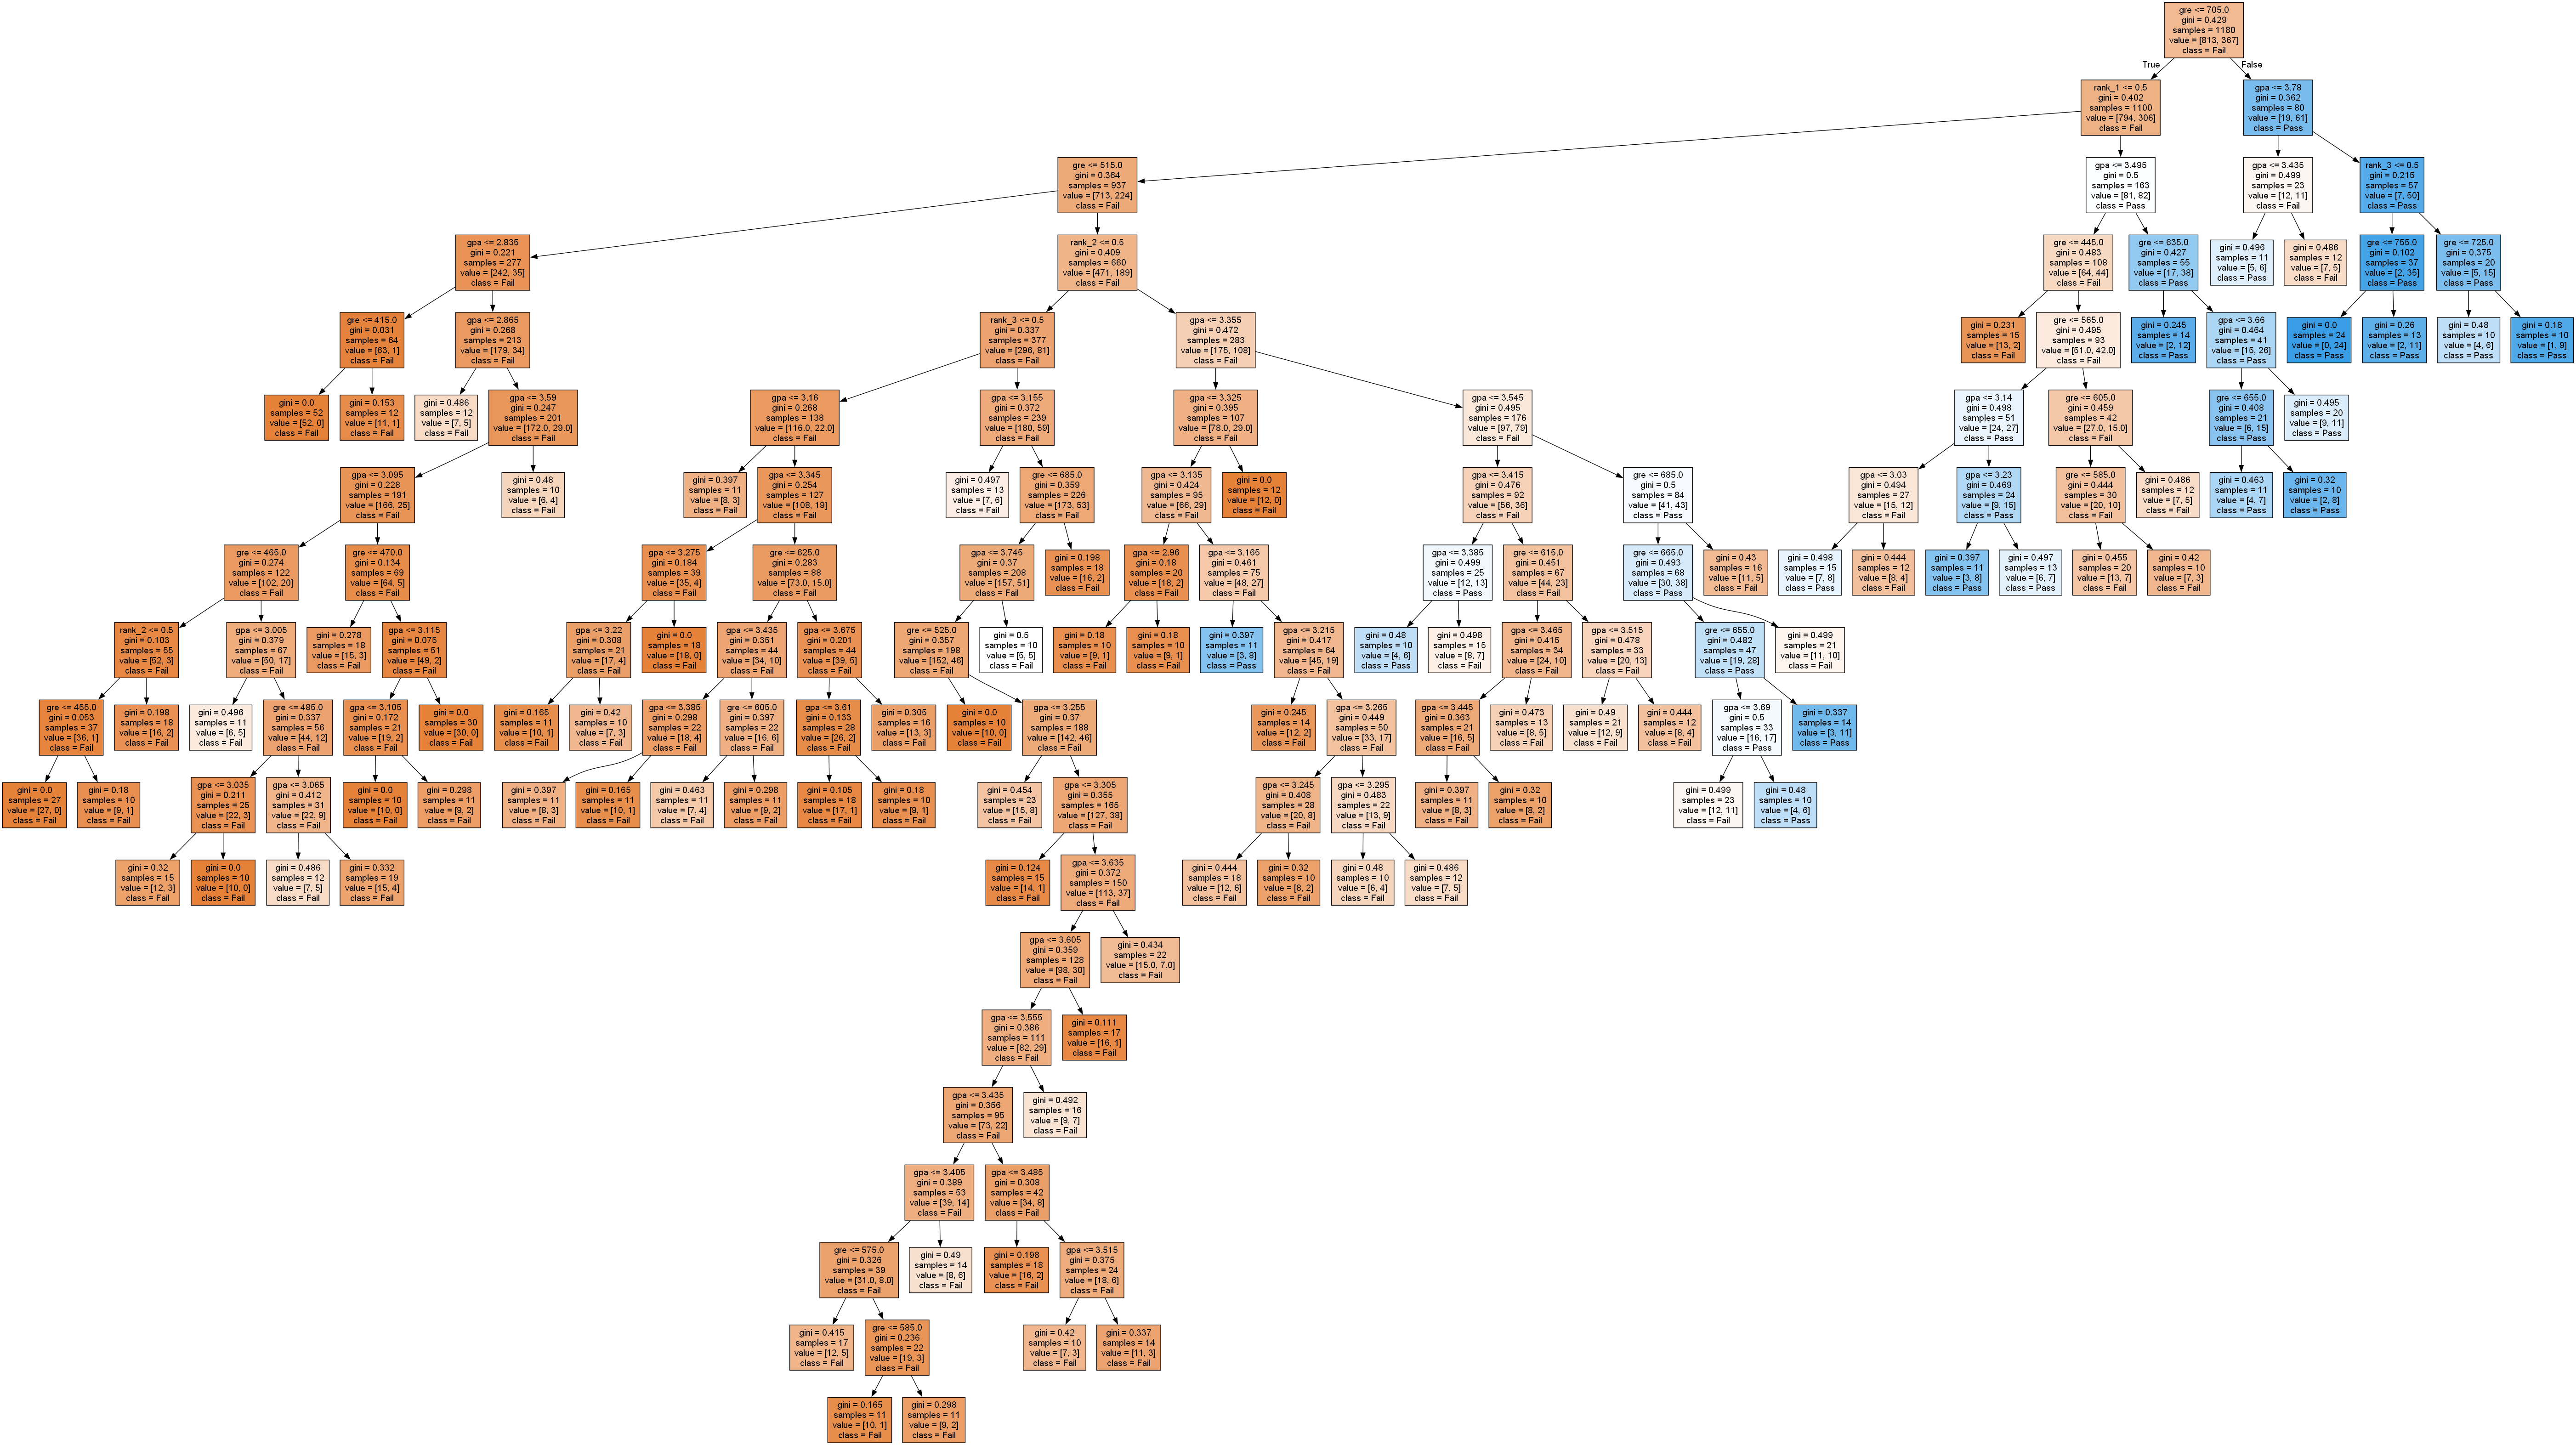

In [39]:
Image('dtc1.png')

In [40]:
model.get_depth()

18

In [41]:
model.get_n_leaves()

82

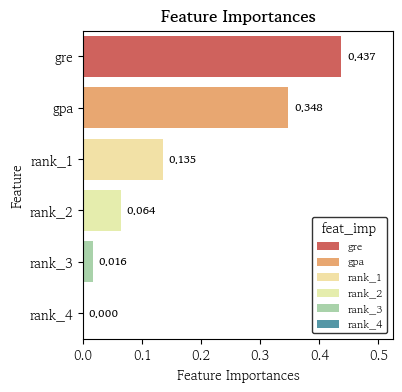

In [42]:
hds.ml.plot_feature_importance(model = model)

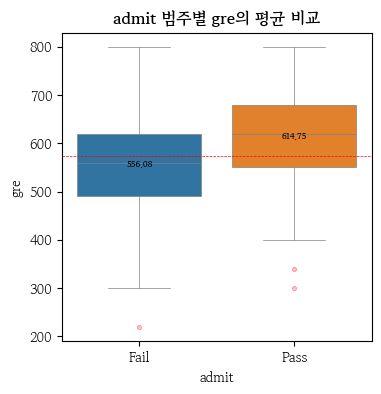

In [44]:
hds.plot.box_group(data = df, x = 'admit', y = 'gre')

In [45]:
path = model.cost_complexity_pruning_path(X = X_train, y = y_train)

In [46]:
path = pd.DataFrame(path)
path

,ccp_alphas,impurities
0,0.000000,0.307100
1,0.000000,0.307100
2,0.000003,0.307102
3,0.000022,0.307124
4,0.000028,0.307152
...,...,...
56,0.004964,0.366432
57,0.007620,0.374052
58,0.008467,0.382519
59,0.016403,0.398922


In [47]:
path.columns = ['alpha', 'impuraty']

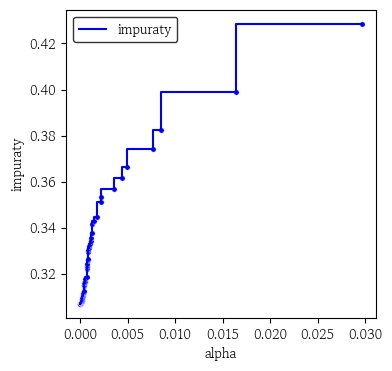

In [48]:
hds.ml.plot_step(data = path, x = 'alpha', y = 'impuraty')

In [49]:
from sklearn.base import clone

In [50]:
path.head()

,alpha,impuraty
0,0.000000,0.307100
1,0.000000,0.307100
2,0.000003,0.307102
3,0.000022,0.307124
4,0.000028,0.307152


In [51]:
trees = []
for alpha in path['alpha']:
    tree = clone(model)
    tree.set_params(ccp_alpha = alpha)
    tree.fit(X = X_train, y = y_train)
    trees.append(tree)

In [52]:
len(trees)

61

In [53]:
trees

[DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                        random_state=0),
 DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.5680534155095303e-06, min_samples_leaf=10,
                        min_samples_split=20, random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.152273338714046e-05, min_samples_leaf=10,
                        min_samples_split=20, random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.8248587570620445e-05, min_samples_leaf=10,
                        min_samples_split=20, random_state=0),
 DecisionTreeClassifier(ccp_alpha=4.695869102648836e-05, min_samples_leaf=10,
                        min_samples_split=20, random_state=0),
 DecisionTreeClassifier(ccp_alpha=7.263922518159754e-05, min_samples_leaf=10,
                        min_samples_split=20, random_state=0),
 DecisionTreeClassifier(ccp_alpha=7.704160246533014e-05, min_samples_leaf=10,

In [54]:
path['depth'] = [t.get_depth() for t in trees]
path['leaves'] = [t.get_n_leaves() for t in trees]
path['train_score'] = [t.score(X = X_train, y = y_train) for t in trees]
path['valid_score'] = [t.score(X = X_valid, y = y_valid) for t in trees]

In [56]:
path.head(n = 10)

,alpha,impuraty,depth,leaves,train_score,valid_score
0,0.000000,0.307100,18,82,0.764407,0.714004
1,0.000000,0.307100,18,82,0.764407,0.714004
2,0.000003,0.307102,18,80,0.764407,0.714004
3,0.000022,0.307124,18,79,0.764407,0.714004
4,0.000028,0.307152,18,78,0.764407,0.714004
5,0.000047,0.307199,18,77,0.764407,0.714004
6,0.000073,0.307271,18,76,0.764407,0.714004
7,0.000077,0.307349,17,75,0.764407,0.714004
8,0.000101,0.307449,17,74,0.764407,0.714004
9,0.000115,0.307564,17,73,0.764407,0.714004


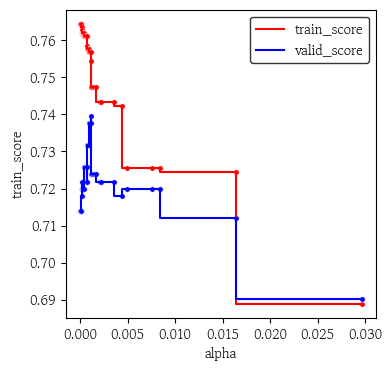

In [57]:
hds.ml.plot_step(data = path, x = 'alpha', y = 'train_score', color = 'red')
hds.ml.plot_step(data = path, x = 'alpha', y = 'valid_score', color = 'blue')

In [61]:
arr = np.array(object = [1, 3, 5, 4, 6, 3, 2, 6, 4, 2])

In [62]:
np.argmax(arr)

4

In [63]:
np.where(arr == np.max(arr))

(array([4, 7], dtype=int64),)

In [58]:
np.argmax(path['valid_score'])

47

In [64]:
locs = np.where(path['valid_score'].eq(path['valid_score'].max()))
locs

(array([47], dtype=int64),)

In [69]:
best_alpha = path['alpha'][locs[0][-1]]
best_alpha

0.0011585060486742418

In [70]:
model.set_params(ccp_alpha = best_alpha)
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0011585060486742418, min_samples_leaf=10,
                       min_samples_split=20, random_state=0)

In [71]:
y_vprob2 = model.predict_proba(X = X_valid)

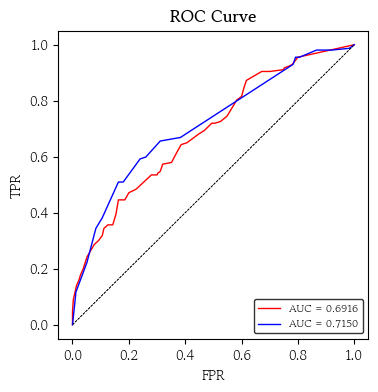

In [73]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'blue')

In [74]:
y_vpred2 = model.predict(X = X_valid)

In [75]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred2)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,321,103,424
Pass,29,54,83
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7571    0.9171    0.8295       350
        Pass     0.6506    0.3439    0.4500       157

    accuracy                         0.7396       507
   macro avg     0.7038    0.6305    0.6397       507
weighted avg     0.7241    0.7396    0.7120       507



In [76]:
hds.ml.plot_tree(model = model, fileName = 'dtc2')

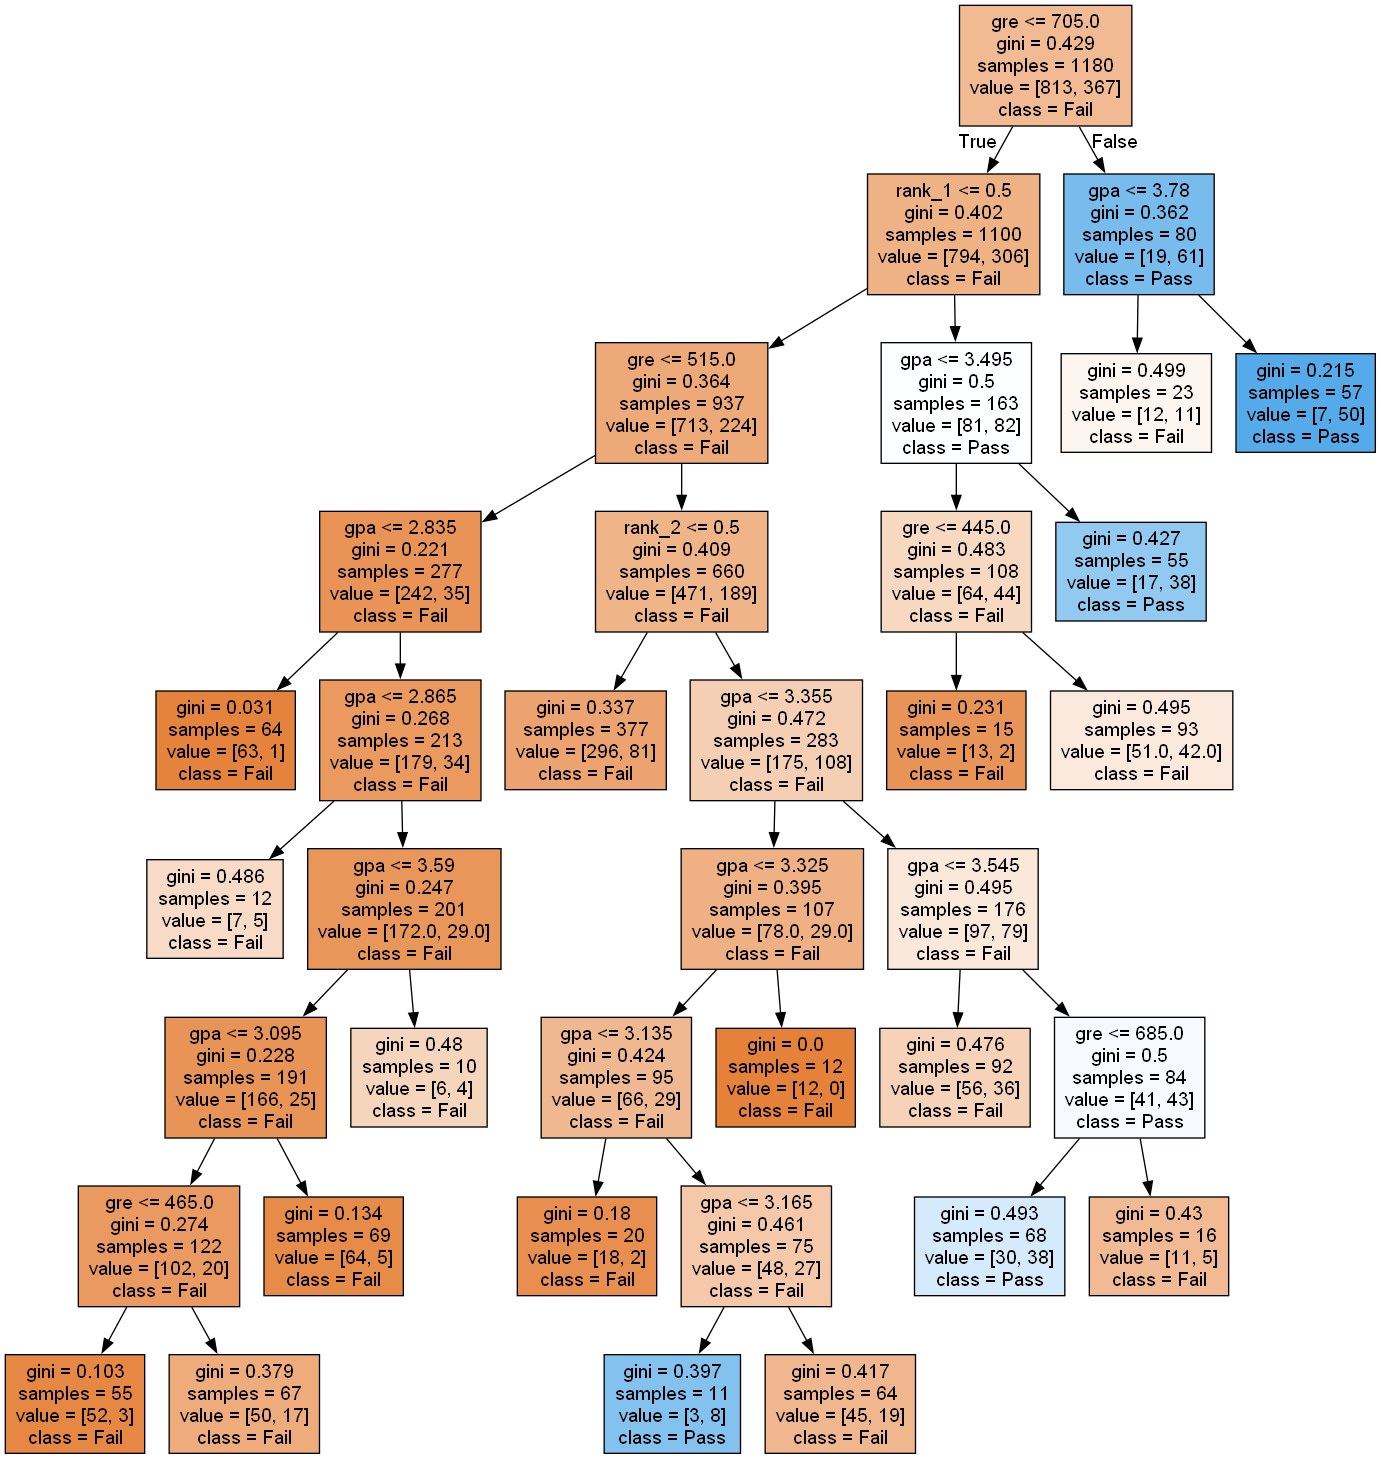

In [77]:
Image('dtc2.png')

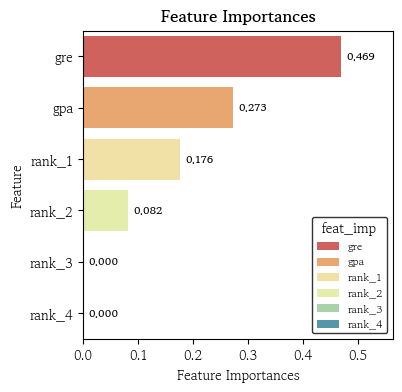

In [78]:
hds.ml.plot_feature_importance(model = model)

### 부트스트래핑의 효과

In [80]:
np.random.seed(seed = 1234)

In [81]:
from scipy import stats

In [82]:
hgts = stats.norm.rvs(loc = 175, scale = 5, size = 1000)

In [83]:
hgts.mean()

175.0787029107688

In [84]:
hgts.std()

4.865330996886148

In [87]:
np.random.seed(seed = 1234)
hgts = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [88]:
hgts.mean()

175.08063230023598

In [89]:
hgts.std()

4.975899527969608

In [90]:
np.random.choice(a = hgts, size = 100, replace = True)

array([160.27713467, 171.65442833, 176.4235075 , 179.12446518,
       177.78388046, 177.22893651, 176.52120483, 182.16791986,
       176.98012031, 167.86511057, 176.82528886, 172.29236732,
       178.44485928, 180.23542625, 172.20565319, 180.23855727,
       175.45923112, 177.13585984, 174.69514621, 175.58782205,
       170.88179307, 179.56780149, 186.6417396 , 181.25698495,
       180.98185422, 170.06131978, 172.49253443, 170.07165214,
       172.40751894, 174.01454122, 163.09955574, 170.01929589,
       174.21278008, 174.27873233, 176.52841392, 171.64549384,
       181.26651612, 168.98456791, 186.05819277, 177.2461705 ,
       179.7909399 , 167.24451206, 177.33197434, 182.11492976,
       165.80046578, 172.33345608, 165.66259988, 179.46132437,
       177.81276146, 176.52120483, 177.09657182, 169.98385199,
       179.18697575, 181.80602819, 179.8256007 , 177.55864221,
       172.76617669, 172.30720391, 175.4600959 , 175.05881953,
       180.27709496, 184.90993335, 172.88032231, 174.40

In [91]:
np.random.seed(seed = 1234)
sample_mean = []
for i in range(100):
    sample = np.random.choice(a = hgts, size = 100, replace = True)
    sample_mean.append(sample.mean())

In [93]:
np.mean(sample_mean)

175.10868934819834

In [94]:
np.var(sample_mean)

0.21196240261699262

In [95]:
np.std(sample_mean)

0.46039374736956695

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
model = RandomForestClassifier(
    n_estimators = 1000, 
    max_features = 3, 
    oob_score = True, 
    random_state = 0
)

In [98]:
model.fit(X = X_train, y = y_train)

RandomForestClassifier(max_features=3, n_estimators=1000, oob_score=True,
                       random_state=0)

In [99]:
model.score(X = X_train, y = y_train)

0.9

In [100]:
model.score(X = X_valid, y = y_valid)

0.7159763313609467

In [101]:
y_vprob3 = model.predict_proba(X = X_valid)

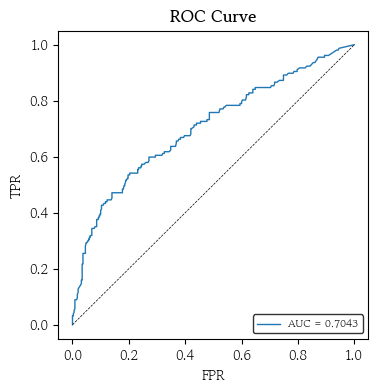

In [102]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob3)

In [103]:
y_vpred3 = model.predict(X = X_valid)

In [104]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred3)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,288,82,370
Pass,62,75,137
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7784    0.8229    0.8000       350
        Pass     0.5474    0.4777    0.5102       157

    accuracy                         0.7160       507
   macro avg     0.6629    0.6503    0.6551       507
weighted avg     0.7069    0.7160    0.7103       507



In [105]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_features': [1, 2, 3, 4, 5]
}

In [113]:
gs = GridSearchCV(estimator = model, param_grid = grid)

In [114]:
gs.fit(X = X_train, y = y_train)

GridSearchCV(estimator=RandomForestClassifier(max_features=3, n_estimators=1000,
                                              oob_score=True, random_state=0),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [115]:
gs.best_params_

{'max_features': 5, 'n_estimators': 100}

In [116]:
model.set_params(max_features = 5, n_estimators = 100)

RandomForestClassifier(max_features=5, oob_score=True, random_state=0)

In [117]:
model.fit(X = X_train, y = y_train)

RandomForestClassifier(max_features=5, oob_score=True, random_state=0)

In [118]:
model.score(X = X_valid, y = y_valid)

0.7159763313609467

In [119]:
y_vprob4 = model.predict_proba(X = X_valid)

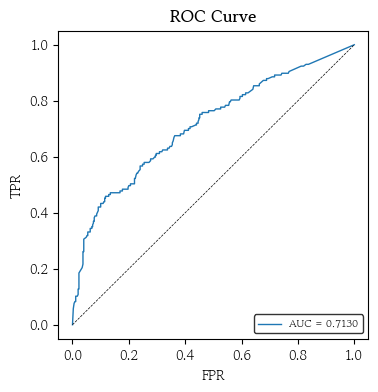

In [120]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob4)

In [121]:
y_vpred4 = model.predict(X = X_valid)

In [122]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred4)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,288,82,370
Pass,62,75,137
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7784    0.8229    0.8000       350
        Pass     0.5474    0.4777    0.5102       157

    accuracy                         0.7160       507
   macro avg     0.6629    0.6503    0.6551       507
weighted avg     0.7069    0.7160    0.7103       507



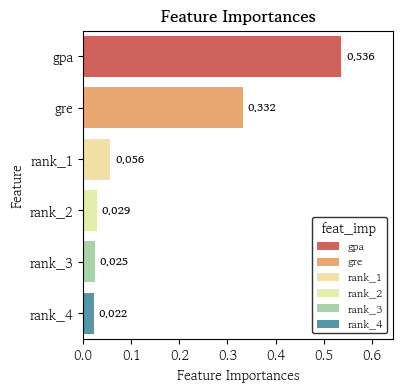

In [123]:
hds.ml.plot_feature_importance(model)